# K Means Clustering Project

For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

## Data

We will use a data frame with 777 observations on the following 18 variables.
<table>
  <tr>
    <td>Private</td>
    <td>A factor with levels No and Yes indicating private or public university</td>
  </tr>
  <tr>
    <td>Apps</td>
    <td>Number of applications received</td>
  </tr>
  <tr>
    <td>Accept</td>
    <td>Number of applications accepted</td>
  </tr>
  <tr>
    <td>Enroll</td>
    <td>Number of new students enrolled</td>
  </tr>
  <tr>
    <td>Top25perc</td>
    <td>Pct. new students from top 25% of H.S. class</td>
  </tr>
  <tr>
    <td>F.Undergrad</td>
    <td>Number of fulltime undergraduates</td>
  </tr>
  <tr>
    <td>P.Undergrad</td>
    <td>Number of parttime undergraduates</td>
  </tr>
  <tr>
    <td>Outstate</td>
    <td>Out-of-state tuition</td>
  </tr>
  <tr>
    <td>Room.Board</td>
    <td>Room and board costs</td>
  </tr>
  <tr>
    <td>Books</td>
    <td>Estimated book costs</td>
  </tr>
  <tr>
    <td>Personal</td>
    <td>Estimated personal spending</td>
  </tr>
  <tr>
    <td>PhD</td>
    <td>Pct. of faculty with Ph.D.’s</td>
  </tr>
  <tr>
    <td>Terminal</td>
    <td>Pct. of faculty with terminal degree</td>
  </tr>
  <tr>
    <td>S.F.Ratio</td>
    <td>Student/faculty ratio</td>
  </tr>
  <tr>
    <td>perc.alumni</td>
    <td>Pct. alumni who donate</td>
  </tr>
  <tr>
    <td>Expend</td>
    <td>Instructional expenditure per student</td>
  </tr>
  <tr>
    <td>Grad.Rate</td>
    <td>Graduation rate</td>
  </tr>
</table>

<hr>

## Get the Data

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
%matplotlib inline
sns.set_style('whitegrid')

**Read in the College_Data file using read_csv. Figure out how to set the first column as the index.**

In [49]:
college_data = pd.read_csv('files/College_Data', index_col='Unnamed: 0')

In [50]:
college_data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Check the info() and describe() methods on the data.**

In [51]:
college_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [52]:
college_data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


<hr>

## Exploratory Data Analysis

**Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column.**

In [53]:
college_data['Private']

Abilene Christian University      Yes
Adelphi University                Yes
Adrian College                    Yes
Agnes Scott College               Yes
Alaska Pacific University         Yes
                                 ... 
Worcester State College            No
Xavier University                 Yes
Xavier University of Louisiana    Yes
Yale University                   Yes
York College of Pennsylvania      Yes
Name: Private, Length: 777, dtype: object

<Figure size 720x576 with 0 Axes>

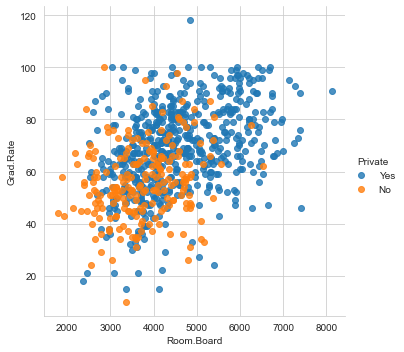

In [54]:
plt.figure(figsize=(10, 8))
sns.lmplot(college_data, x='Room.Board', y='Grad.Rate', hue='Private', fit_reg=False)

**Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

<Figure size 720x576 with 0 Axes>

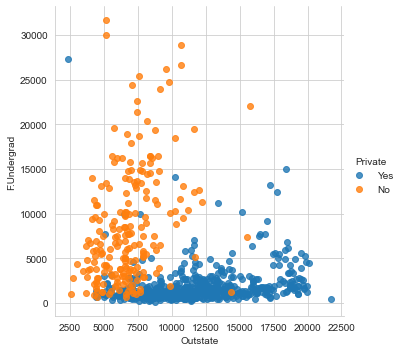

In [55]:
plt.figure(figsize=(10, 8))
sns.lmplot(college_data, x='Outstate', y='F.Undergrad', hue='Private', fit_reg=False)

**Create a stacked histogram showing Out of State Tuition based on the Private column. Try doing this using [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html). If that is too tricky, see if you can do it just by using two instances of pandas.plot(kind='hist').**

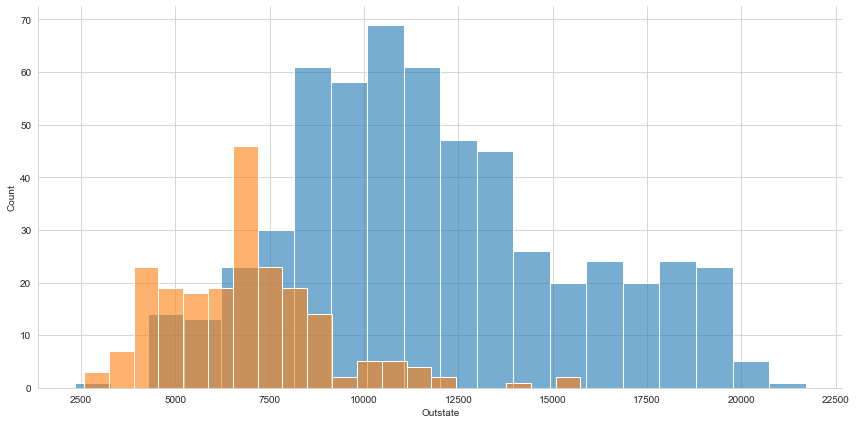

In [56]:
g = sns.FacetGrid(college_data, hue='Private', height=6, aspect=2)
g.map_dataframe(sns.histplot, x='Outstate', bins=20, alpha=0.6)

**Create a similar histogram for the Grad.Rate column.**

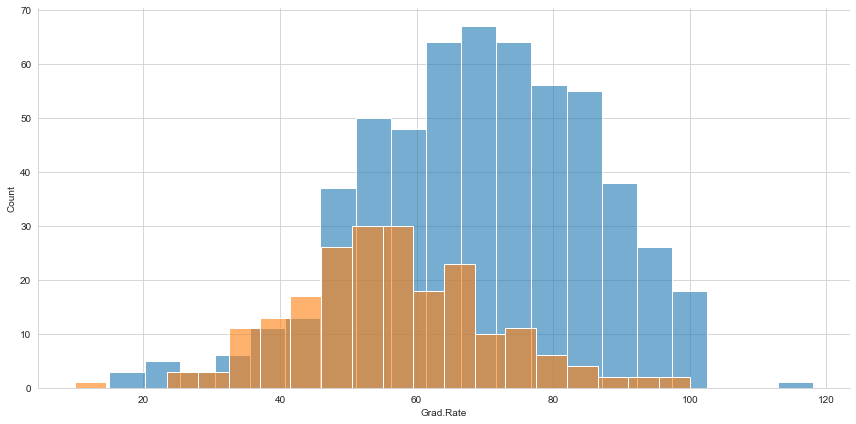

In [57]:
g = sns.FacetGrid(college_data, hue='Private', height=6, aspect=2)
g.map_dataframe(sns.histplot, x='Grad.Rate', bins=20, alpha=0.6)

**Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?**

In [58]:
college_data[college_data['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


**Set that school's graduation rate to 100 so it makes sense. You may get a warning not an error when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.**

In [59]:
college_data['Grad.Rate']['Cazenovia College'] = 100

C:\Users\Asus\AppData\Local\Temp/ipykernel_2832/375978673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  college_data['Grad.Rate']['Cazenovia College'] = 100


In [60]:
college_data[college_data['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


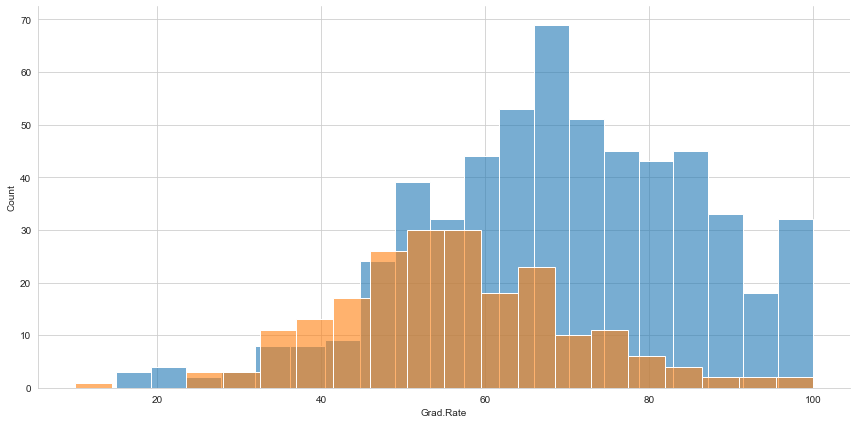

In [61]:
g = sns.FacetGrid(college_data, hue='Private', height=6, aspect=2)
g.map_dataframe(sns.histplot, x='Grad.Rate', bins=20, alpha=0.6)

<hr>

## K Means Cluster Creation

**Create an instance of a K Means model with 2 clusters.**

In [62]:
from sklearn.cluster import KMeans

In [63]:
kmeans = KMeans(n_clusters=2)

**Fit the model to all the data except for the Private label.**

In [64]:
kmeans.fit(college_data.drop('Private', axis=1))

KMeans(n_clusters=2)

**What are the cluster center vectors?**

In [65]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

<hr>

## Evaluation

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters

**Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [66]:
college_data = pd.get_dummies(college_data, 'Private', drop_first=True)
college_data.rename(columns={'Private_Yes':'Cluster'}, inplace=True)
college_data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


**Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

In [68]:
print(confusion_matrix(college_data['Cluster'], kmeans.labels_))

[[ 74 138]
 [ 34 531]]


In [69]:
print(classification_report(college_data['Cluster'], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



<hr>